# Decompose HSC observed dual AGN

This notebook requires standard python libraries and the publicly available packages on github:
See https://github.com/dartoon/galight/blob/master/requirements.txt

This notebook has been tested with galight ==  0.1.2

For more information, please contact me: dingxuheng@126.com

This notebook is almost identical to the 'galight_HSC_QSO.ipynb', only that two point source are considerred.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

#Data is available at: #Data is available at: https://drive.google.com/file/d/1Axwo-aD5yFrkuHIlYBsQ8ma1nHRpcAHg/view?usp=sharing
fitsFile = pyfits.open('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I.fits')

#Load the fov image data:
fov_image = fitsFile[1].data # check the back grounp

#Derive the header informaion, might be used to obtain the pixel scale and the exposure time.
header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']

#Derive the fov noise level map:
err_data= fitsFile[3].data ** 0.5

#Calculate the zeropoint for HSC filters:
file_header0 = fitsFile[0].header
FLUXMAG0 = file_header0['FLUXMAG0']
zp =  2.5 * np.log10(FLUXMAG0)   # This is something Xuheng can't make sure.

#Load the PSF data:
PSF = pyfits.getdata('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I_psf.fits')

Estimating the background light ... ... ...


        Use `~photutils.segmentation.SourceCatalog` instead. [galight.tools.measure_tools]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]


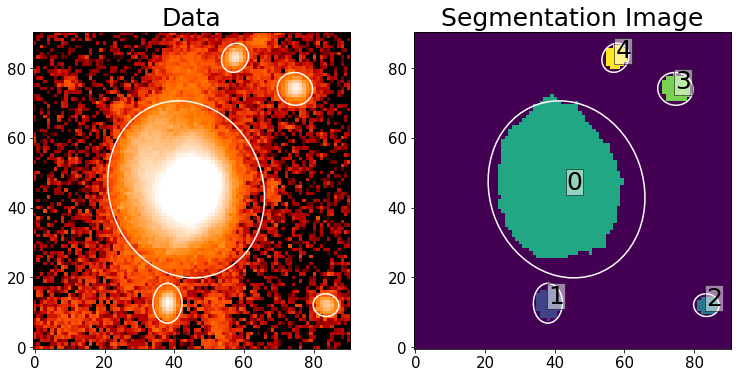

 id xcentroid ycentroid     source_sum         orientation      area 
       pix       pix                               deg          pix2 
--- --------- --------- ------------------ ------------------- ------
  2     38.03     12.59 34.896729417675104   89.21411790843028   52.0
  1     83.52     12.04 13.821556402010291  -6.475213966005328   26.0
  0     43.38     45.26 2978.2939357329733  -71.31208889488929 1242.0
  3     74.62     74.11  34.66137726279544 -11.679348571711683   52.0
  4     57.42     83.02 21.372018850140464   59.01165501594018   35.0
Input directly the a obj that used to create MASK, use space between each id:
2 4
The data_process is ready to go to pass to FittingSpecify!


In [2]:
from galight.data_process import DataProcess
image_RA = 214.156021
image_DEC = 0.564521
data_process = DataProcess(fov_image = fov_image, fov_noise_map = err_data, target_pos = [image_RA, image_DEC],
                           pos_type = 'wcs', header = header,
                          rm_bkglight = True, if_plot=False, zp = zp)

#Generate the fitting materials
data_process.generate_target_materials(radius=45, create_mask = True, nsigma=2.8,
                                      exp_sz= 1.2, npixels = 15, if_plot=False)

#Manually input the PSF:
data_process.PSF_list = [PSF]

#Check if all the materials is given, if so to pass to the next step.
data_process.checkout() #Check if all the materials is known.

The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


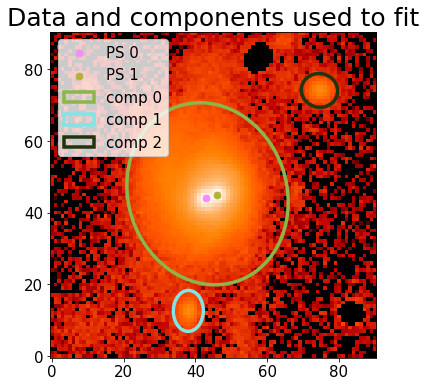

In [3]:
#%%Start to produce the class and params for lens fitting.
from galight.fitting_specify import FittingSpecify
fit_sepc = FittingSpecify(data_process)
fit_sepc.prepare_fitting_seq(point_source_num = 2) #point_source_num =2 for dual AGN.

#Plot the initial settings for fittings. 
fit_sepc.plot_fitting_sets()

fit_sepc.build_fitting_seq()

Computing the PSO ...
10
20
30
40
50
Max iteration reached! Stopping.
-10.46442289299553 reduced X^2 of best position
-42705.30982631476 logL
8162.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 4.116527812662045, 'n_sersic': 5.291484236954611, 'e1': -0.12406282516648909, 'e2': -0.025073946904014346, 'center_x': 0.07908677934256429, 'center_y': -0.07301178689469473}, {'amp': 1, 'R_sersic': 0.19321235744622273, 'n_sersic': 1.1297946890291528, 'e1': -0.24201137321086671, 'e2': -0.10170820066057969, 'center_x': 1.211884654650751, 'center_y': -5.401300843694957}, {'amp': 1, 'R_sersic': 0.17330244119251006, 'n_sersic': 2.342713839534004, 'e1': -0.09269592980891507, 'e2': -0.18204164578194296, 'center_x': -4.973881687103498, 'center_y': 4.848973138125458}] lens light result
[{'ra_image': array([0.40488806]), 'dec_image': array([-0.22266904]), 'point_amp': array([1.])}, {'ra_image': array([-0.24430024]), 'dec_image': array([0.01236361]), 'point_amp': 

100%|█████████████████████████████████████████████████| 130/130 [04:05<00:00,  1.89s/it]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  100
Sampling iterations (in current run): 130
247.56157803535461 time taken for MCMC sampling
265.77 total time taken for the overall fitting (s)
============ CONGRATULATION, YOUR JOB WAS SUCCESSFUL ================ 
Start transfering the Params to fluxs...
6600 MCMC samplers in total, finished translate: 1000
6600 MCMC samplers in total, finished translate: 2000
6600 MCMC samplers in total, finished translate: 3000
6600 MCMC samplers in total, finished translate: 4000
6600 MCMC samplers in total, finished translate: 5000
6600 MCMC samplers in total, finished translate: 6000


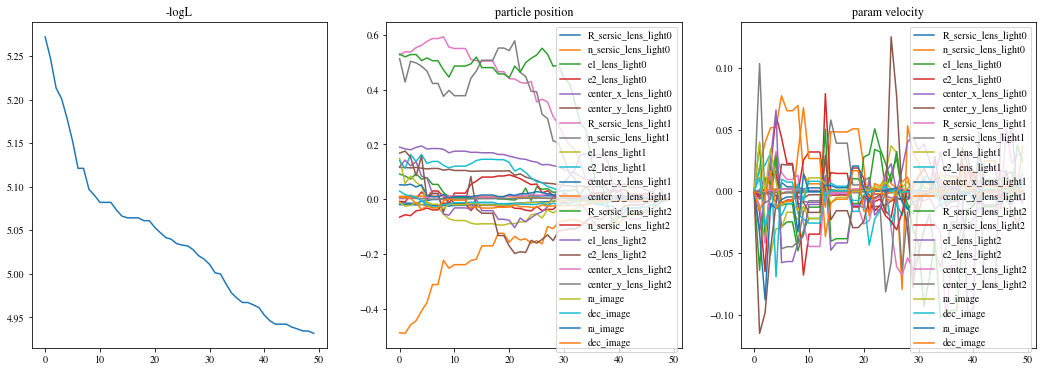

<Figure size 432x288 with 0 Axes>

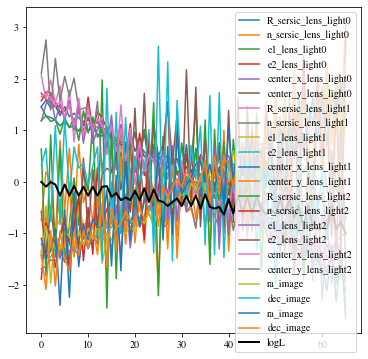

-10.267472904966333 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  10.267472904966333


/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:41: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:89: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:124: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,
/Users/Dartoon/Astro/Packages/lenstronomy/lenstronomy/Plots/model_band_plot.py:522: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data - model), origin='lower', vmin=v_min, vmax=v_max,


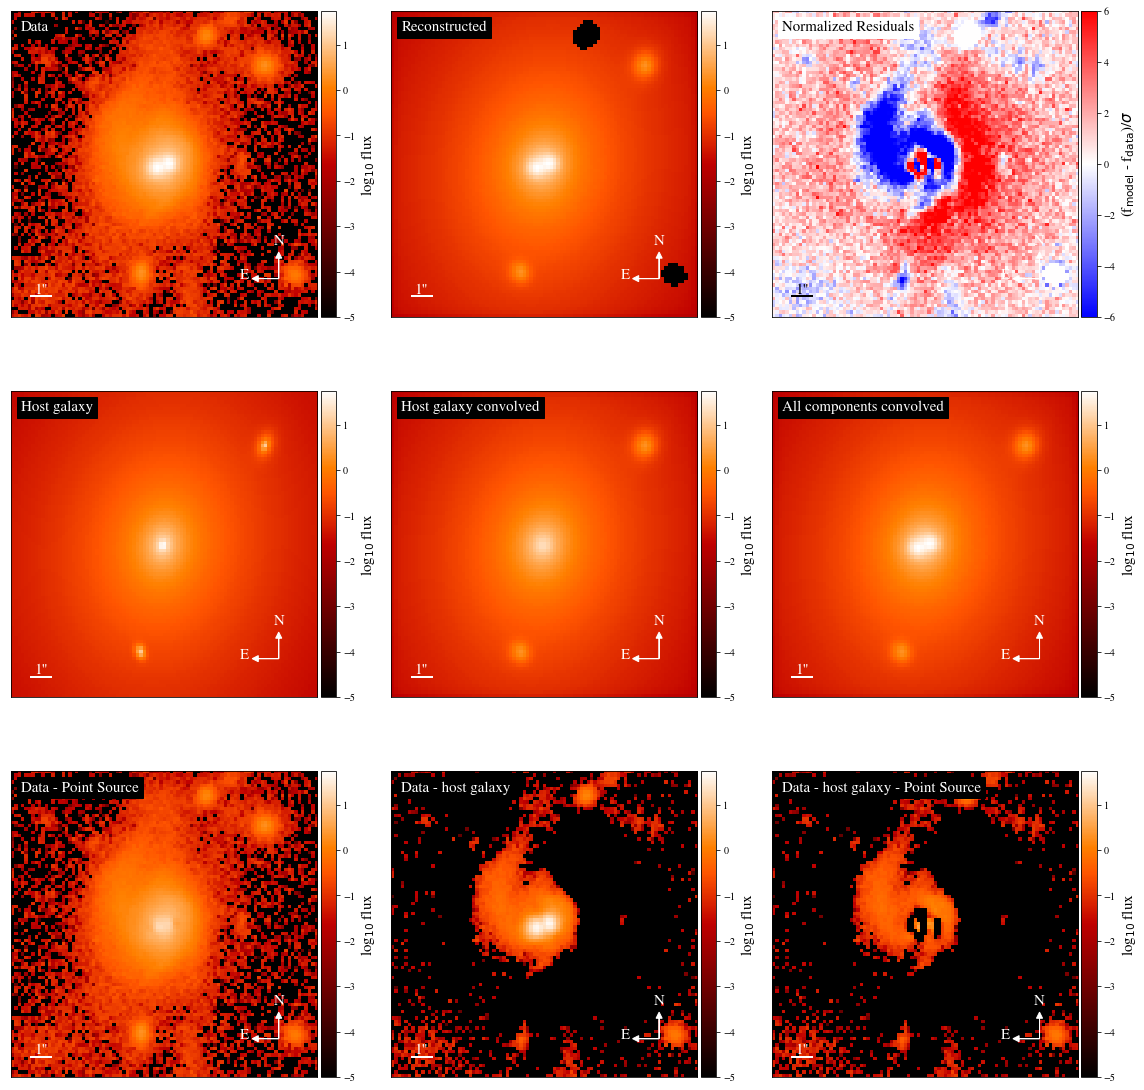

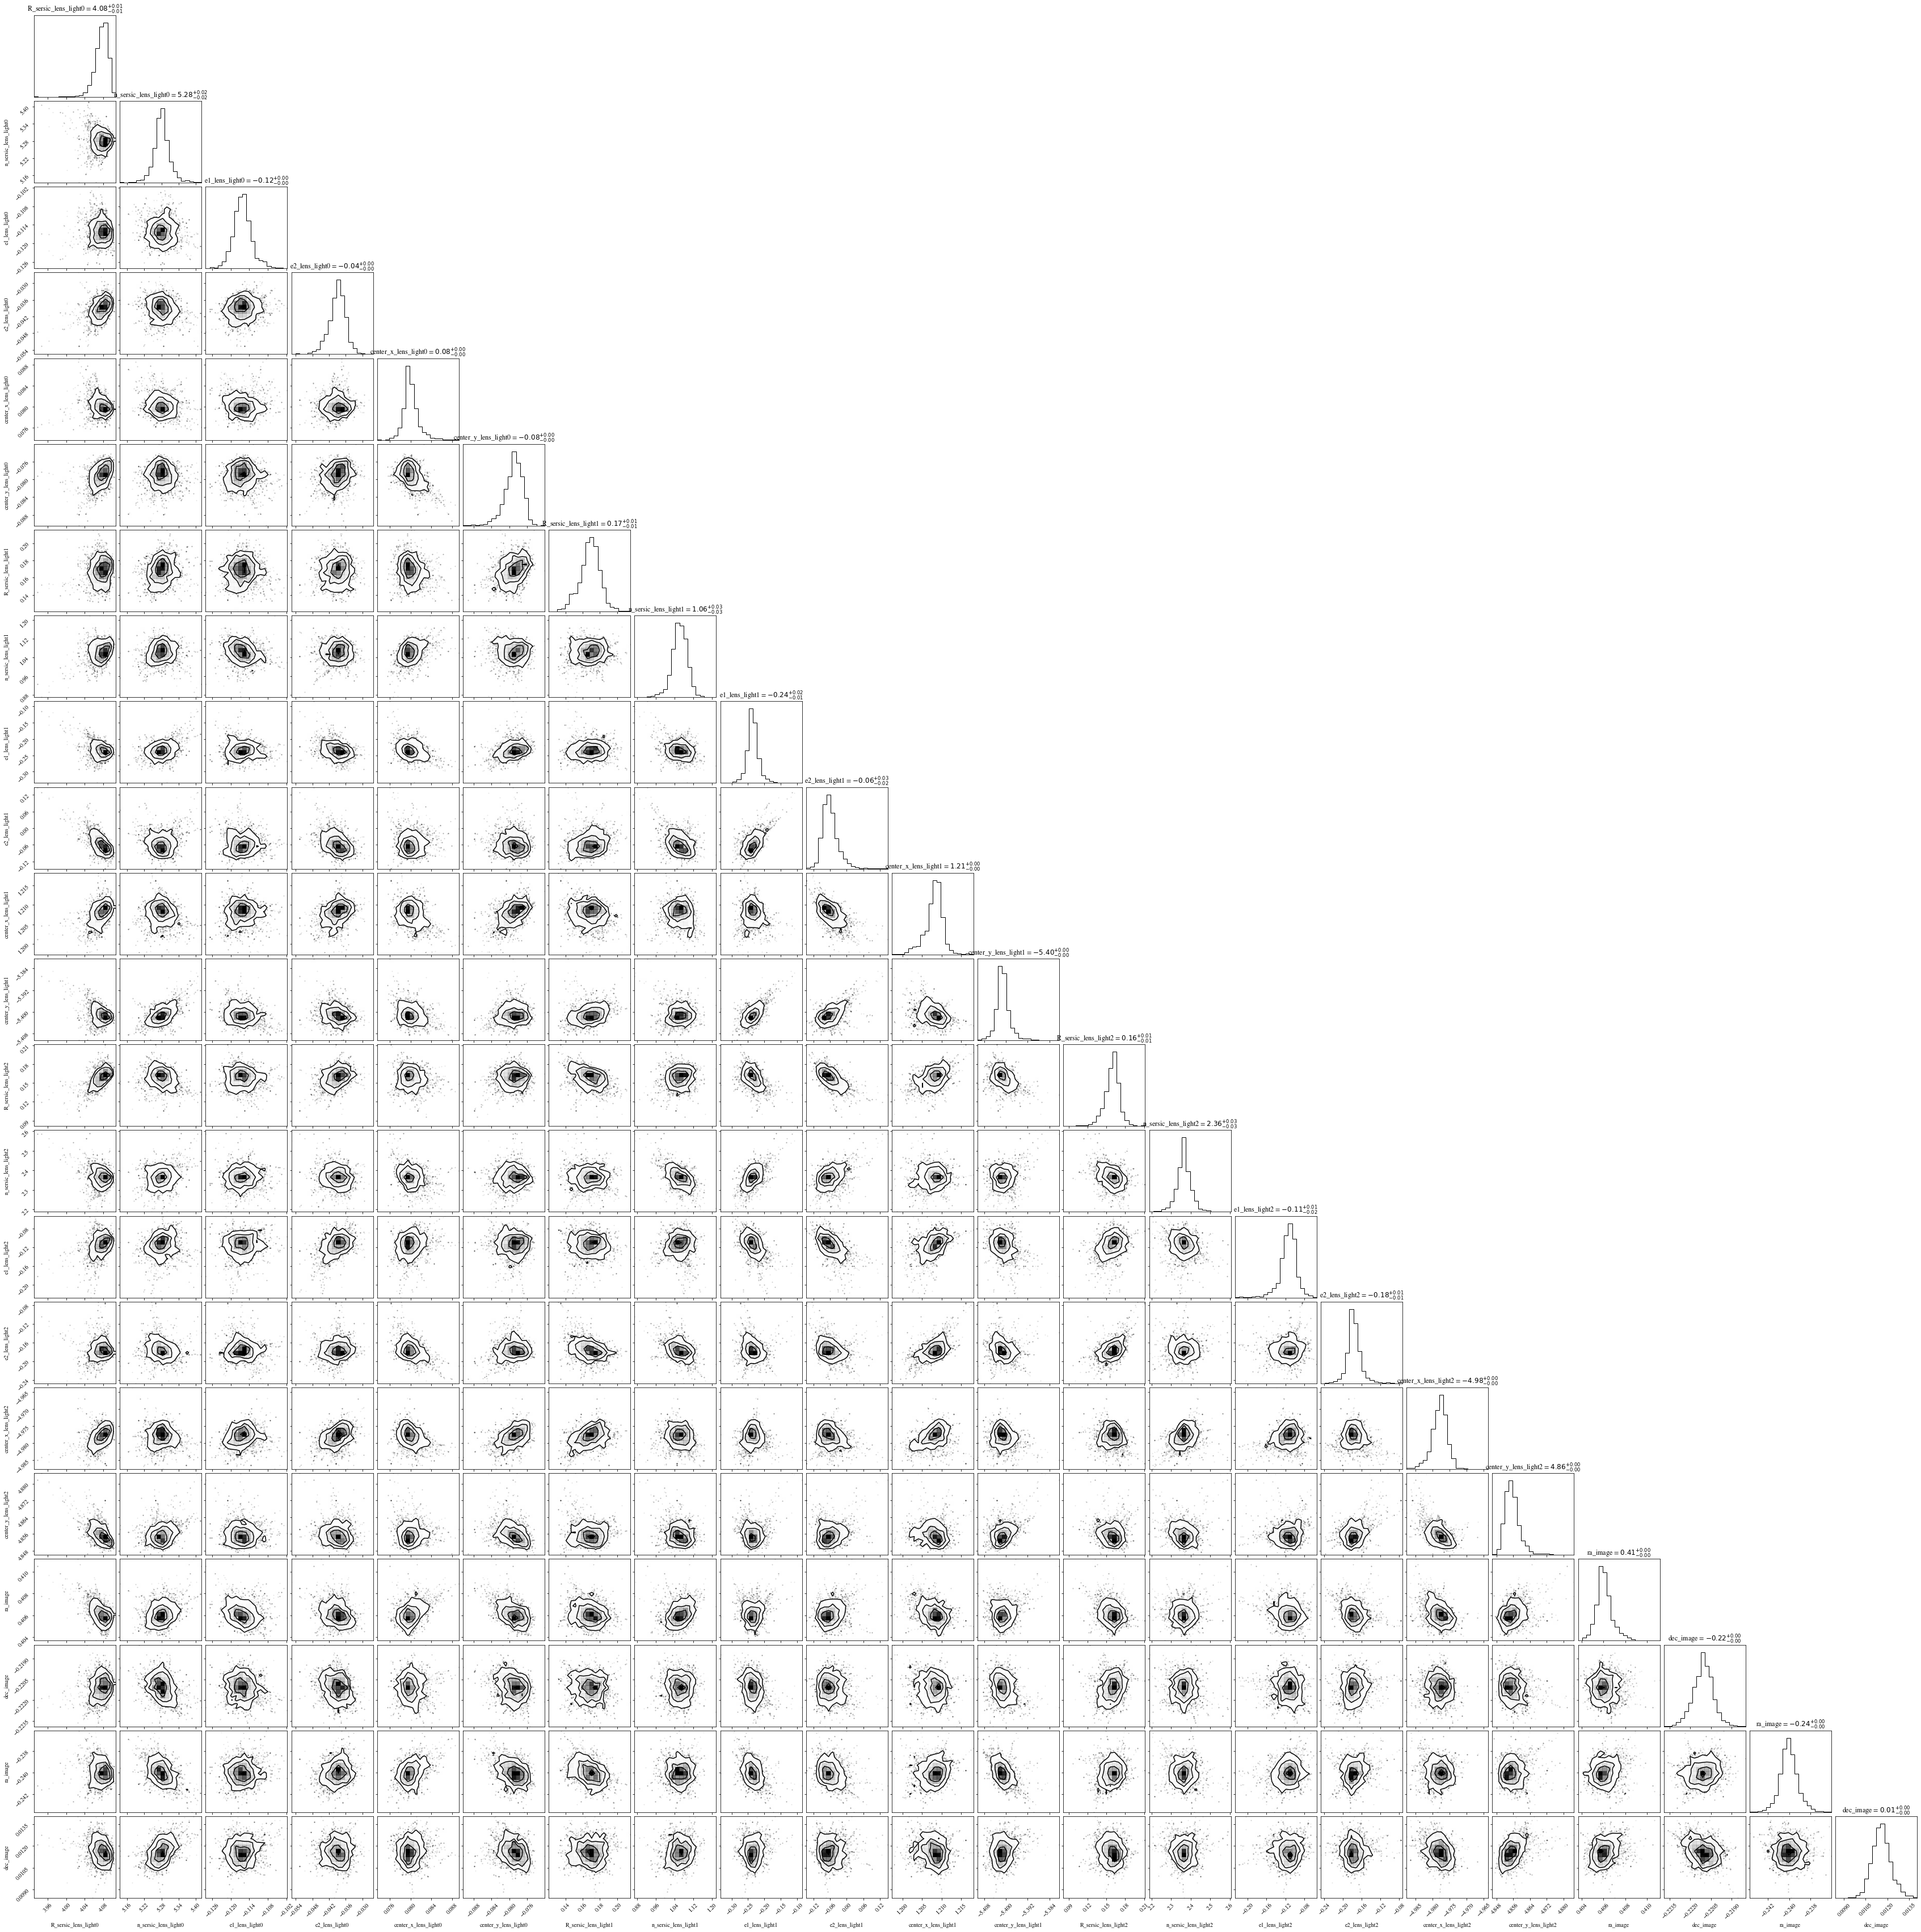

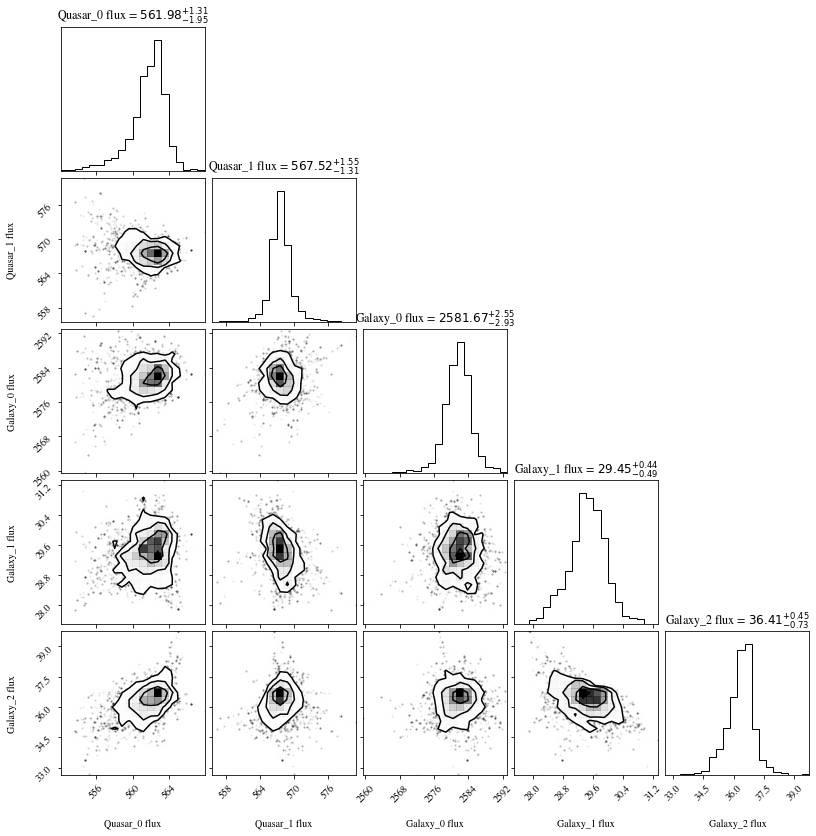

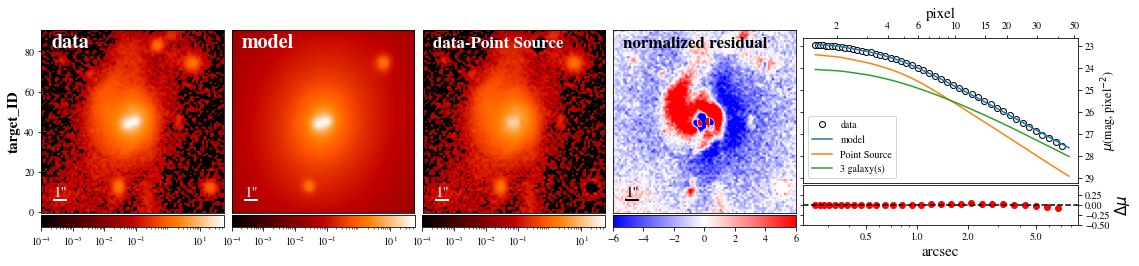

In [4]:
#%%Setting the fitting method and run.
from galight.fitting_process import FittingProcess
fit_run = FittingProcess(fit_sepc, savename = 'HSC_dualAGN')
fit_run.run()
fit_run.plot_all()
fit_run.dump_result()


In [5]:
#Load the saved fitting class, the fitting_run_result would be the loaded as fit_run() in previous fittings.
import pickle
picklename = 'HSC_dualAGN.pkl'
fitting_run_result = pickle.load(open(picklename,'rb'))
#fitting_run_result.plot_final_qso_fit()
fitting_run_result.final_result_galaxy

[{'amp': 11.608177247045427,
  'R_sersic': 3.9622585241297887,
  'n_sersic': 5.331919810750668,
  'e1': -0.12231614245596271,
  'e2': -0.04153407249806336,
  'center_x': 0.0775104832567406,
  'center_y': -0.0821867331671446,
  'phi_G': -1.4071228254717638,
  'q': 0.7712038071869863,
  'flux_sersic_model': 4748.128141188979,
  'flux_within_frame': 2567.826917817479,
  'magnitude': 18.476085632164178},
 {'amp': 153.3191998651446,
  'R_sersic': 0.14772077573869474,
  'n_sersic': 0.9175367838035849,
  'e1': -0.1568956688877316,
  'e2': 0.10919476828115976,
  'center_x': 1.2026683075961493,
  'center_y': -5.388634993214806,
  'phi_G': 1.2667880631454054,
  'q': 0.6790444006672732,
  'flux_sersic_model': 38.59724066429973,
  'flux_within_frame': 28.419598947163905,
  'magnitude': 23.365955137648978},
 {'amp': 171.50380006441816,
  'R_sersic': 0.1444565818578041,
  'n_sersic': 2.5212143582395776,
  'e1': -0.16642798983115295,
  'e2': -0.1251158366468461,
  'center_x': -4.985493910172353,
  'c